In [2]:
import matplotlib.pyplot as plt
import numpy as np
import jax
import jax.numpy as jnp
from jax import random as random

from mm_sbi_review.examples.misspec_ma1 import assumed_dgp, calculate_summary_statistics, true_dgp

In [3]:
key = random.PRNGKey(0)
t1 = random.uniform(key, (200,), minval=-1, maxval=1)

# Initialize an array to save the output
ssx = np.zeros((200, 2))

# Run the simulations in a for loop
for i in range(200):
    key, subkey = random.split(key)
    ssx[i] = calculate_summary_statistics(assumed_dgp(subkey, t1[i]))

print(ssx.shape)  # Should print (200, 100)


(200, 2)


In [4]:
# Perform random prior draws for the assumed DGP
num_draws = 2
prior_draws = []
key = random.PRNGKey(0)
for _ in range(num_draws):
    key, subkey = random.split(key)
    t1 = random.uniform(subkey, (1,), minval=-1, maxval=1)
    prior_draws.append(assumed_dgp(subkey, t1, n_obs).flatten())

# Plot the prior draws
plt.figure(figsize=(12, 6))
for i, draw in enumerate(prior_draws):
    plt.plot(draw, label=f'Prior Draw {i+1}')
plt.title('Random Prior Draws for Assumed DGP')
plt.xlabel('Time')
plt.ylabel('Value')
plt.ylim([-3.0, 3.0])
plt.legend()
plt.show()
plt.clf()

NameError: name 'n_obs' is not defined

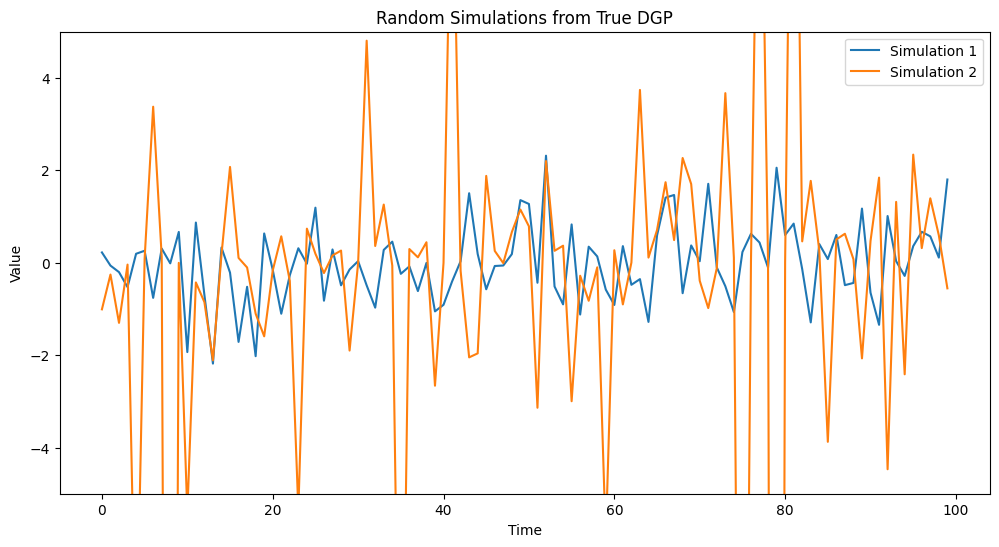

In [5]:
# Define the number of simulations
num_simulations = 2

# Initialize an array to save the output
true_dgp_simulations = []
key = random.PRNGKey(1)
# Run the simulations
for _ in range(num_simulations):
    key, subkey = random.split(key)
    w = random.uniform(subkey, (1,), minval=-1, maxval=1)
    key, subkey = random.split(key)
    rho = random.uniform(subkey, (1,), minval=-1, maxval=1)
    key, subkey = random.split(key)
    sigma_v = random.exponential(subkey, (1,))
    params = jnp.array([w, rho, sigma_v])
    true_dgp_simulations.append(true_dgp(subkey, w, rho, sigma_v).flatten())

# Plot the simulations
plt.figure(figsize=(12, 6))
for i, sim in enumerate(true_dgp_simulations):
    plt.plot(sim, label=f'Simulation {i+1}')
plt.title('Random Simulations from True DGP')
plt.xlabel('Time')
plt.ylabel('Value')
plt.ylim([-5.0, 5.0])
plt.legend()
plt.show()

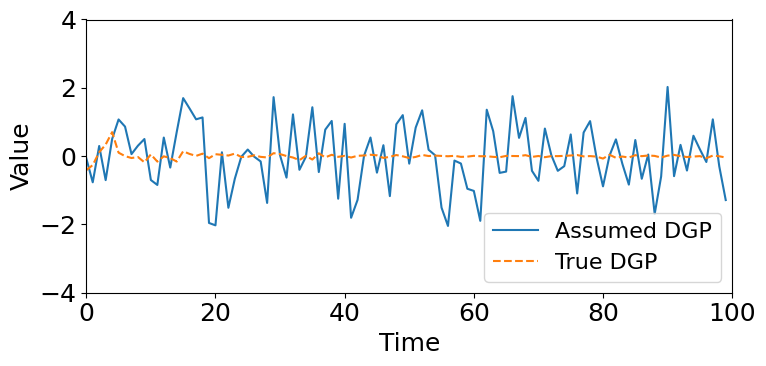

In [15]:
plt.rcParams.update({'font.size': 18})

# Generate full dataset for assumed DGP
key, subkey = random.split(key)
n_obs = 100
t1 = jnp.array([0])
ssx = assumed_dgp(subkey, t1, n_obs).flatten()

# Generate full dataset for true DGP
key, subkey = random.split(key)
ssy = true_dgp(subkey).flatten()

# Create a single figure
plt.figure(figsize=(8, 4))

# Plot both time series
plt.plot(ssx, label='Assumed DGP', color='tab:blue', linewidth=1.5)
plt.plot(ssy, label='True DGP', color='tab:orange', linewidth=1.5, linestyle='--')

# Add title and labels
# plt.title(r'Comparison of Assumed and True DGP Time Series', fontsize=14)
plt.xlabel(r'Time', fontsize=18)
plt.ylabel(r'Value', fontsize=18)
plt.ylim([-3.0, 3.0])

# Add grid and legend
plt.grid(False)
plt.legend(fontsize=16)
plt.xlim([0, 100])
plt.ylim([-4.0, 4.0])
# Adjust layout and save
plt.tight_layout()
plt.savefig('dgp_time_series_comparison.pdf', dpi=300)
plt.show()


In [ ]:
key, subkey = random.split(key)
ssy = calculate_summary_statistics(true_dgp(subkey))
ssy

Array([ 0.01248568, -0.00198956], dtype=float32)

## ABC

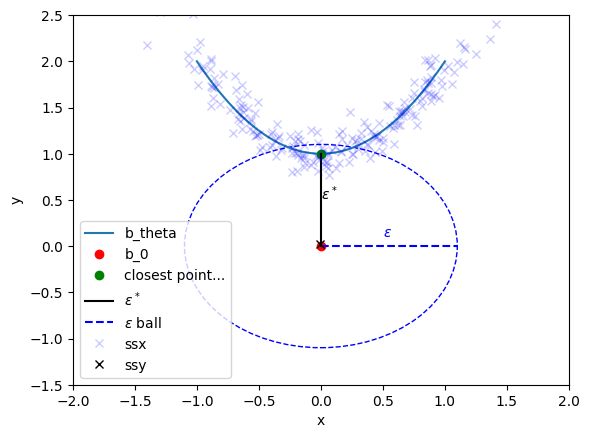

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define b_theta and b_0
b_theta = lambda t : [1 + t ** 2 , t]
b_0 = np.array([0.0007, 0])

# Calculate b_theta results
b_theta_res_y = [ b_theta(x)[0] for x in np.linspace(-1, 1, 101)]
b_theta_res_x = [ b_theta(x)[1] for x in np.linspace(-1, 1, 101)]

# Plot b_theta
plt.plot(b_theta_res_x, b_theta_res_y, label='b_theta')

# Plot b_0
plt.plot(b_0[1], b_0[0], 'ro', label='b_0')

# Define the Euclidean ball (circle) around b_0 with radius 1.1
circle = plt.Circle((b_0[1], b_0[0]), 1.1, color='b', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Plot the closest point in b_theta to b_0, which is (0, 1)
closest_point = np.array([1, 0])
plt.plot(closest_point[1], closest_point[0], 'go', label='closest point...')

# Draw a line between b_0 and the closest point
plt.plot([b_0[1], closest_point[1]], [b_0[0], closest_point[0]], 'k-', label=r'$\epsilon^*$')

# Label the circle and the line
plt.text(0.5, 0.1, r'$\epsilon$', color='b')
plt.text((b_0[1] + closest_point[1]) / 2, (b_0[0] + closest_point[0]) / 2, r'$\epsilon^*$', color='k')

# Draw dotted parallel lines to x-axis for epsilon label
# plt.plot([b_0[1], b_0[1] + 1.1], [b_0[0] + 1.1, b_0[0] + 1.1], 'b--')
plt.plot([b_0[1], b_0[1] + 1.1], [b_0[0], b_0[0]], 'b--', label=r'$\epsilon$' + ' ball')

plt.plot(ssx[:, 1], ssx[:, 0], 'bx', alpha=0.2, label='ssx')

plt.plot(ssy[1], ssy[0], 'kx', label='ssy')

# Set plot limits and labels
plt.xlim(-2.0, 2.0)
plt.ylim(-1.5, 2.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("figs/misspec_ma1_abc_sum_space.pdf")

## BSL

In [ ]:
n = 100

cov_mat_fn = lambda t: jnp.array([[
    (2/(n ** 4))*(n ** 3 * (1 + t ** 2) ** 2 + 2 * n ** 2 * (n - 1) * t ** 2),
    (2 /(n ** 4)) * (n ** 2 * ((n -1) * (2 * (1 + t ** 2) * t)))],
                               [(2 /(n ** 4)) * (n ** 2 * ((n - 1) * (2 * (1 + t ** 2) * t))),
                                (1 / (n ** 2)) * (((n -1) * (2 * (1 + t ** 2) ** 2 * t ** 2)) + 2 * (n - 2) * t ** 2)]
]
                               )

In [ ]:
cov_matrices

[Array([[2.e-05, 0.e+00],
        [0.e+00, 0.e+00]], dtype=float32),
 Array([[ 9.7921678e-05, -6.5159351e-05],
        [-6.5159351e-05,  1.6199677e+05]], dtype=float32),
 Array([[9.7921678e-05, 6.5159351e-05],
        [6.5159351e-05, 1.6199677e+05]], dtype=float32)]

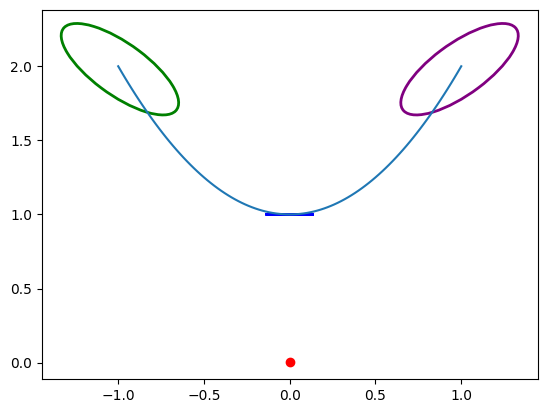

In [ ]:
b_theta = lambda t : [1 + t ** 2 , t]
b_0 = np.array([0.0007, 0])

# Calculate b_theta results
b_theta_res_y = [ b_theta(x)[0] for x in np.linspace(-1, 1, 101)]
b_theta_res_x = [ b_theta(x)[1] for x in np.linspace(-1, 1, 101)]

# Plot b_theta
plt.plot(b_theta_res_x, b_theta_res_y, label='b_theta')

# Plot b_0
plt.plot(b_0[1], b_0[0], 'ro', label='b_0')

t_values = [0, -0.99, 0.99]
colors = ['blue', 'green', 'purple']
cov_matrices = [cov_mat_fn(t) for t in [0, -0.99, 0.99]]

for t, cov_matrix, color in zip(t_values, cov_matrices, colors):
    eigvals, eigvecs = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    width, height = 2 * np.sqrt(eigvals)
    ellipse = plt.matplotlib.patches.Ellipse(xy=(b_theta(t)[1], b_theta(t)[0]),
                                             width=width, height=height,
                                             angle=angle, edgecolor=color, fc='None', lw=2, label=f'Covariance at t={t}')
    plt.gca().add_patch(ellipse)

plt.savefig("figs/misspec_ma1_bsl_sum_space_cov.pdf")

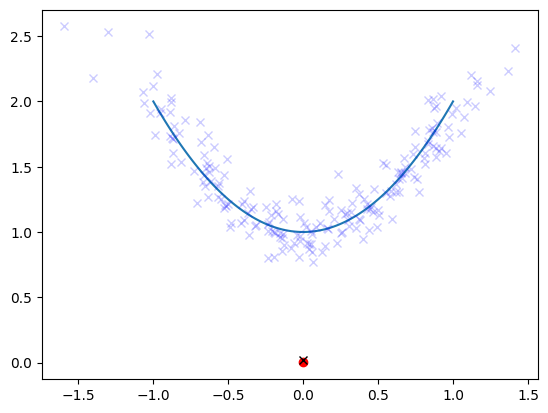

In [ ]:
b_theta = lambda t : [1 + t ** 2 , t]
b_0 = np.array([0.0007, 0])

# Calculate b_theta results
b_theta_res_y = [ b_theta(x)[0] for x in np.linspace(-1, 1, 101)]
b_theta_res_x = [ b_theta(x)[1] for x in np.linspace(-1, 1, 101)]

# Plot b_theta
plt.plot(b_theta_res_x, b_theta_res_y, label='b_theta')

# Plot b_0
plt.plot(b_0[1], b_0[0], 'ro', label='b_0')

plt.plot(ssx[:, 1], ssx[:, 0], 'bx', alpha=0.2, label='ssx')

plt.plot(ssy[1], ssy[0], 'kx', label='ssy')

plt.savefig("figs/misspec_ma1_cde_sum_space.pdf")

## CDE / NLE

In [ ]:
eigvals

array([9.788954e-03, 6.509484e+03], dtype=float32)